<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/W6D4_xp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# read a txt file (semicolon-separated in this dataset)
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)

# check first rows
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Part 2 : Handling Missing Values
Identify columns in the dataset that contain missing values.

Fill the missing values using the mean of the respective columns.

Verify that there are no more missing values in the dataset.

In [ ]:
# 1. Convert numeric columns (except Date, Time) to float
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Check missing values
print("Missing values before filling:")
print(df.isna().sum())

Missing values before filling:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
# 3. Fill missing values with mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)

# 4. Verify no more missing values
print("\nMissing values after filling:")
print(df.isna().sum())


Missing values after filling:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
# 1. Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

# 2. Set Datetime as index (useful for time series work)
df.set_index('Datetime', inplace=True)

# 3. Drop the old Date and Time columns (optional)
df.drop(columns=['Date', 'Time'], inplace=True)

# 4. Check result
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00         

# Part 3 : Data Visualization

Resample the ‘Global_active_power’ column over a day and plot the sum and mean values.

Create a plot showing the mean and standard deviation of the ‘Global_intensity’ column resampled over a day.

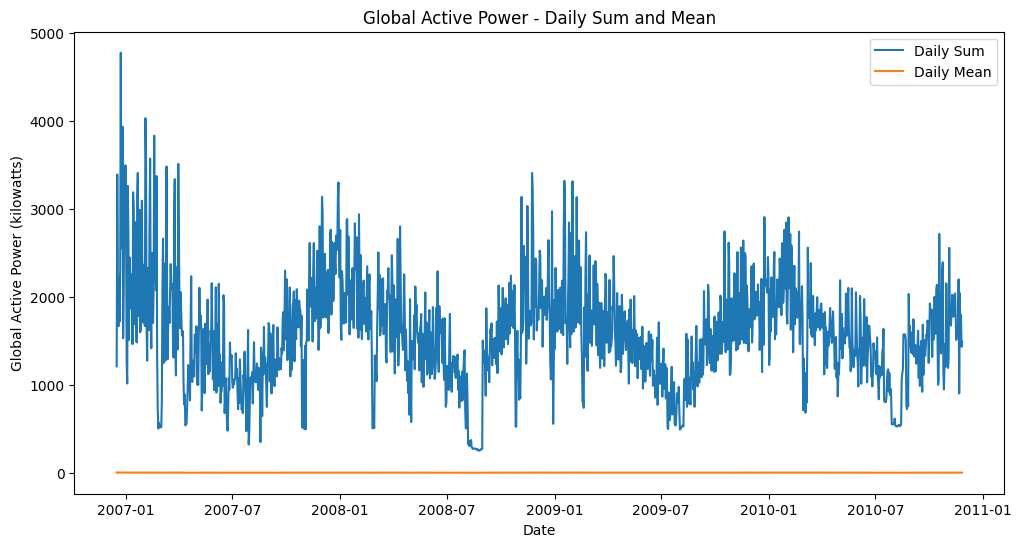

In [ ]:
# --- 1. Resample Global_active_power per day ---
daily_power_sum = df['Global_active_power'].resample('D').sum()
daily_power_mean = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(12,6))
plt.plot(daily_power_sum, label='Daily Sum')
plt.plot(daily_power_mean, label='Daily Mean')
plt.title('Global Active Power - Daily Sum and Mean')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

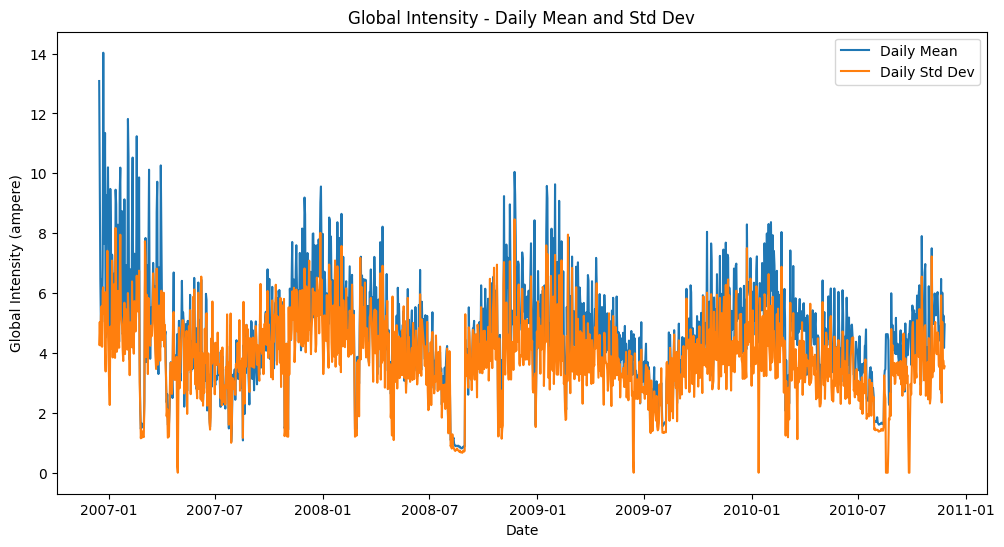

In [ ]:
# --- 2. Resample Global_intensity per day ---
daily_intensity_mean = df['Global_intensity'].resample('D').mean()
daily_intensity_std = df['Global_intensity'].resample('D').std()

plt.figure(figsize=(12,6))
plt.plot(daily_intensity_mean, label='Daily Mean')
plt.plot(daily_intensity_std, label='Daily Std Dev')
plt.title('Global Intensity - Daily Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Global Intensity (ampere)')
plt.legend()
plt.show()

In [36]:
# averege all numeric measures per day
df_daily_sum = df.resample('D').mean()

# Check the first few rows
print(df_daily_sum.head())

            Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                      
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361       

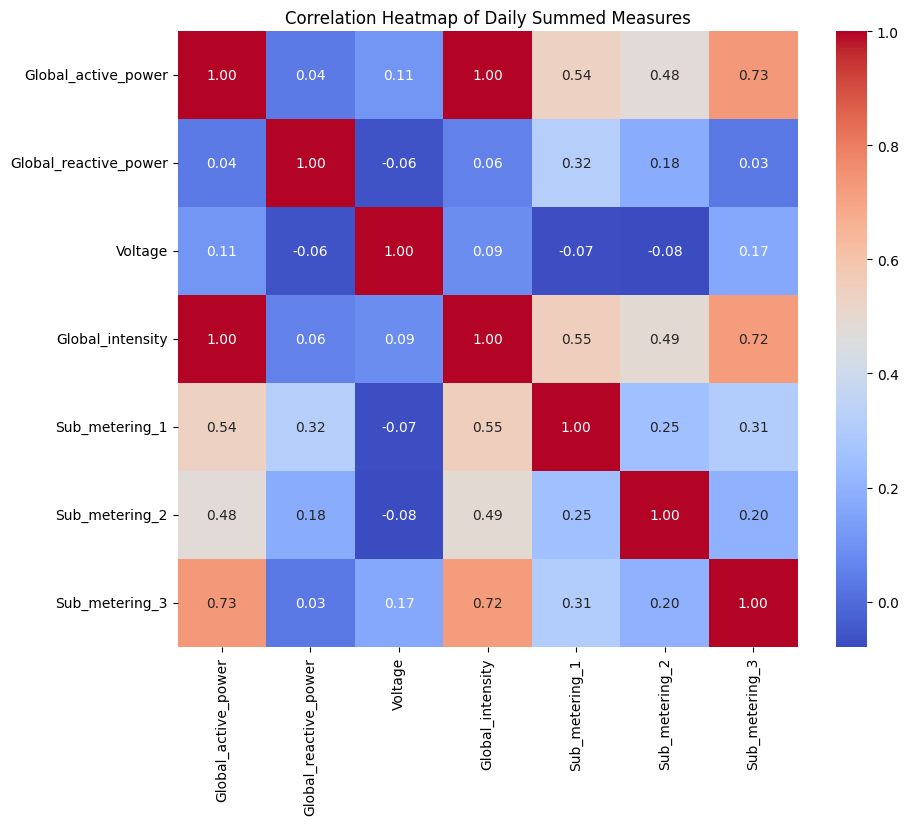

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_daily_sum.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Daily Summed Measures")
plt.show()

# Part 4 : Data Preprocessing for LSTM

Normalize the dataset to prepare it for LSTM model training.

Split the dataset into training and testing sets.

Reshape the data to fit the input requirements of an LSTM model.

In [48]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# -----------------------------
# Step 1: Filter one year (example: 2007)
# -----------------------------
df_2007 = df_daily_sum['2007-01-01':'2010-12-31']

# -----------------------------
# Step 2: Normalize the data
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_2007)
scaled_df = pd.DataFrame(scaled_data, index=df_2007.index, columns=df_2007.columns)

# -----------------------------
# Step 3: Split into training/testing
# -----------------------------
train_size = int(len(scaled_df) * 0.8)
train_data = scaled_df[:train_size]
test_data = scaled_df[train_size:]

# -----------------------------
# Step 4: Create sequences for LSTM
# -----------------------------
seq_length = 60  # 60 days

def create_sequences(data, seq_length=60, target_col='Global_active_power'):
    X, y = [], []
    data_values = data.values
    target_idx = data.columns.get_loc(target_col)
    for i in range(seq_length, len(data_values)):
        X.append(data_values[i-seq_length:i])
        y.append(data_values[i, target_idx])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# -----------------------------
# Step 5: Check shapes
# -----------------------------
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1080, 60, 7)
y_train shape: (1080,)
X_test shape: (226, 60, 7)
y_test shape: (226,)


# Part 5 : Building an LSTM

Import the necessary libraries for building an LSTM model.

Define the architecture of the LSTM model, including the number of layers and neurons.

Compile the model with an appropriate loss function and optimizer.

In [49]:
# -----------------------------
# Part 5: Building an LSTM
# -----------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer: single neuron for predicting Global_active_power
model.add(Dense(1))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,851 (124.42 KB)

 Trainable params: 31,851 (124.42 KB)

 Non-trainable params: 0 (0.00 B)


# Part 6 : Training and Evaluating the LSTM Model

Train the LSTM model on the training dataset.

Evaluate the model’s performance on the testing dataset.

Plot the training and validation loss to assess the model’s learning progress.

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0407 - val_loss: 0.0170
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0208 - val_loss: 0.0088
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0205 - val_loss: 0.0087
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0195 - val_loss: 0.0121
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0188 - val_loss: 0.0097
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0188 - val_loss: 0.0095
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0173 - val_loss: 0.0098
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0176 - val_loss: 0.0153
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0177 - val_loss: 0.0084
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0173 - val_loss: 0.0091
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0176 - val_loss: 0.0088
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0

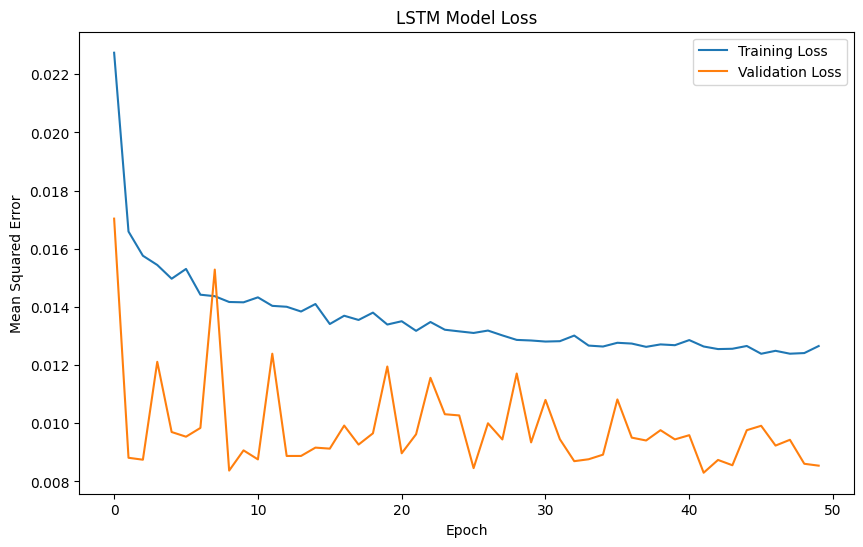

In [50]:
# -----------------------------
# Part 6: Training and Evaluating the LSTM
# -----------------------------

import matplotlib.pyplot as plt

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,             # you can adjust epochs
    batch_size=16,         # you can adjust batch size
    validation_data=(X_test, y_test),
    shuffle=False          # important for time series
)

# -----------------------------
# Evaluate the model on the test set
# -----------------------------
test_loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)

# -----------------------------
# Plot training and validation loss
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


X_test_seq shape: (286, 60, 7)
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


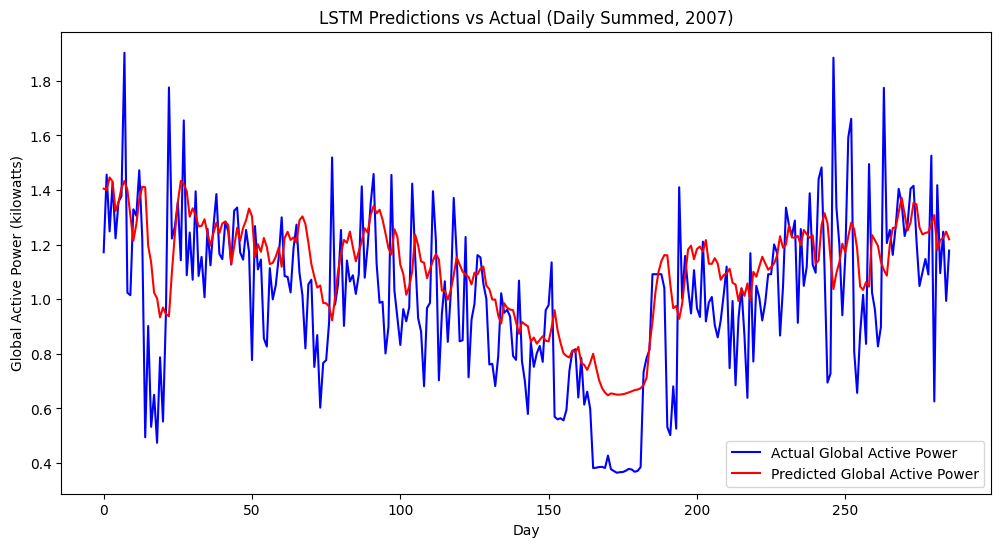

Root Mean Squared Error (RMSE): 0.24862915705400163
Mean Absolute Error (MAE): 0.19015652699422614


In [51]:
# -----------------------------
# Step 1: Prepare test sequences for prediction
# -----------------------------
# Concatenate train and test to get full context
full_data = pd.concat([train_data, test_data])

# Get last 60 days before test set
seq_length = 60
inputs = full_data[-(len(test_data) + seq_length):].values

# Prepare X_test sequences
X_test_seq = []
for i in range(seq_length, len(inputs)):
    X_test_seq.append(inputs[i-seq_length:i])

X_test_seq = np.array(X_test_seq)
print("X_test_seq shape:", X_test_seq.shape)

# -----------------------------
# Step 2: Make predictions
# -----------------------------
predicted_power = model.predict(X_test_seq)

# -----------------------------
# Step 3: Inverse scaling
# -----------------------------
# Prepare array with same number of features
predicted_full = np.zeros((predicted_power.shape[0], scaled_df.shape[1]))
predicted_full[:, scaled_df.columns.get_loc('Global_active_power')] = predicted_power[:, 0]

# Inverse transform
predicted_actual = scaler.inverse_transform(predicted_full)[:, scaled_df.columns.get_loc('Global_active_power')]

# Get actual values from test set
y_test_actual = df_daily_sum[-len(test_data):]['Global_active_power'].values

# -----------------------------
# Step 4: Plot predictions vs actual
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, color='blue', label='Actual Global Active Power')
plt.plot(predicted_actual, color='red', label='Predicted Global Active Power')
plt.title('LSTM Predictions vs Actual (Daily Summed, 2007)')
plt.xlabel('Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

# -----------------------------
# Step 5: Compute RMSE and MAE
# -----------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, predicted_actual))
mae = mean_absolute_error(y_test_actual, predicted_actual)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


In [ ]:
print(df.index.min(), df.index.max())

2006-12-16 17:24:00 2010-11-26 21:02:00
